# Quantum_addition_of_two_numbers

The code runs in IBM QISKIT quantum Simulator/ Simulator for adding two numbers The file has two functions - one to represent binary numbers in quantum state and another to carry out rotations for additions using cp (control rotation) gates.

In [ ]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [ ]:
# Function to change decimal number to Binary numbers and to Qiskit States
def change2qubit(a,b):
    a_bin = '{0:{fill}3b}'.format(a, fill='0')
    b_bin = '{0:{fill}3b}'.format(b, fill='0')
    qa = QuantumRegister(3,'a')
    qb = QuantumRegister(3,'b')
    ca = ClassicalRegister(3,'c')
    qc = QuantumCircuit(qa, qb, ca)
    for i in range(3):
        if a_bin[i] == '1':
            qc.x(qa[2-i])
        if b_bin[i] == '1':
            qc.x(qb[2-i])
    return qc, qa, qb, ca

In [ ]:
# Function which adds/rotates and retains the answer in the first register
def add_rotations(qc, t_reg, c_reg, n):
    for i in range(0, n+1):
        qc.cp(np.pi / 2**i, c_reg[n-i], t_reg[n])

In [ ]:
a = 1
b = 2
n = 3

qc, qa, qb, ca = change2qubit(a,b)

In [ ]:
qc.append(QFT(n, do_swaps=False), [0,1,2])
for i in range(0, n):
    add_rotations(qc, qa, qb, 2-i)
qc.append(QFT(n, do_swaps=False).inverse(), [0,1,2])

In [ ]:
qc.measure(qa, ca)
qc.draw('text')

┌───┐┌──────┐                                                ┌───────┐┌─┐»
a_0: ┤ X ├┤0     ├──────────────────────────────────────────■─────┤0      ├┤M├»
     └───┘│      │                                          │     │       │└╥┘»
a_1: ─────┤1 QFT ├──────────────────────────■──────■────────┼─────┤1 IQFT ├─╫─»
          │      │                          │      │        │     │       │ ║ »
a_2: ─────┤2     ├─■──────■────────■────────┼──────┼────────┼─────┤2      ├─╫─»
          └──────┘ │      │        │P(π/4)  │      │P(π/2)  │P(π) └───────┘ ║ »
b_0: ──────────────┼──────┼────────■────────┼──────■────────■───────────────╫─»
     ┌───┐         │      │P(π/2)           │P(π)                           ║ »
b_1: ┤ X ├─────────┼──────■─────────────────■───────────────────────────────╫─»
     └───┘         │P(π)                                                    ║ »
b_2: ──────────────■────────────────────────────────────────────────────────╫─»
                                                                            ║ »
c: 3/═══════════════════════════════════════════════════════════════════════╩═»
                                                                            0 »
«           
«a_0: ──────
«     ┌─┐   
«a_1: ┤M├───
«     └╥┘┌─┐
«a_2: ─╫─┤M├
«      ║ └╥┘
«b_0: ─╫──╫─
«      ║  ║ 
«b_1: ─╫──╫─
«      ║  ║ 
«b_2: ─╫──╫─
«      ║  ║ 
«c: 3/═╩══╩═
«      1  2

In [ ]:
qc = qc.decompose(reps=2)

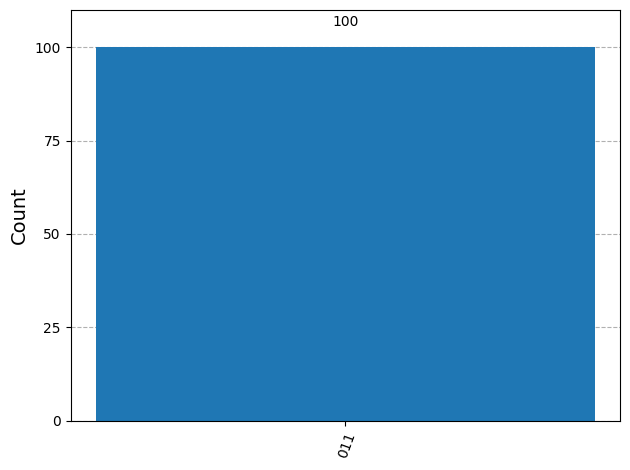

In [ ]:
# Setup backend and run
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=100)
result = job.result()

# Get results and plot
answer = result.get_counts()
plot_histogram(answer)